In [1]:
import numpy as np
import glob
import math
from skimage import io,color,feature,exposure
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [2]:
lbp=np.genfromtxt('CSV\\lbp_distance\\orl_faces_lbp_CityBlockDistanceMatrix.csv',delimiter=',',dtype=np.float)
ltp=np.genfromtxt('CSV\\ltp_distance\\orl_faces_ltp_CityBlockDistanceMatrix.csv',delimiter=',',dtype=np.float)
sltp=np.genfromtxt('CSV\\sltp_distance\\orl_faces_sltp_CityBlockDistanceMatrix.csv',delimiter=',',dtype=np.float)
sltp2=np.genfromtxt('CSV\\sltp2_distance\\orl_faces_sltp2_CityBlockDistanceMatrix.csv',delimiter=',',dtype=np.float)
coltp=np.genfromtxt('CSV\\coltp_distance\\orl_faces_coltp_CityBlockDistanceMatrix.csv',delimiter=',',dtype=np.float)
coltp2=np.genfromtxt('CSV\\coltp2_distance\\orl_faces_coltp2_CityBlockDistanceMatrix.csv',delimiter=',',dtype=np.float)
coltp_lbp=np.genfromtxt('CSV\\coltp_lbp_distance\\orl_faces_coltp_lbp_CityBlockDistanceMatrix.csv',delimiter=',',dtype=np.float)
coltp2_pca=np.genfromtxt('CSV\\coltp2_pca_distance\\orl_faces_coltp2_pca_CityBlockDistanceMatrix.csv',delimiter=',',dtype=np.float)

In [3]:
def averagePrecision(distance_matrix,classes,retrive_images,relevant_images_DB):
    
    class_precision = [0]*classes
    
    i=0
    for distmat in distance_matrix:
        relevant_images=sum(np.floor(np.argsort(distmat)[:retrive_images]/relevant_images_DB)==math.floor(i/relevant_images_DB))
        class_precision[math.floor(i/relevant_images_DB)]+=relevant_images/retrive_images
        l=i
        i=i+1;
        if math.floor(i/relevant_images_DB)!=math.floor(l/relevant_images_DB):
            class_precision[math.floor(l/relevant_images_DB)]/=relevant_images_DB
            
    class_precision*=100
    average_precision = sum(class_precision)/classes
    
    return class_precision,average_precision

In [4]:
def averageRecall(distance_matrix,classes,retrive_images,relevant_images_DB):
    
    class_recall = [0]*classes
    
    i=0
    for distmat in distance_matrix:
        relevant_images=sum(np.floor(np.argsort(distmat)[:retrive_images]/relevant_images_DB)==math.floor(i/relevant_images_DB))
        class_recall[math.floor(i/relevant_images_DB)]+=relevant_images/relevant_images_DB
        l=i
        i=i+1;
        if math.floor(i/relevant_images_DB)!=math.floor(l/relevant_images_DB):
            class_recall[math.floor(l/relevant_images_DB)]/=relevant_images_DB
    class_recall*=100
    average_recall = sum(class_recall)/classes
    return class_recall,average_recall

In [5]:
classes = 40
retrive_images = 5
relevant_images_DB = 10

lbp_city_block_class_precision,lbp_city_block_average_precision = averagePrecision(lbp,classes,retrive_images,relevant_images_DB)
lbp_city_block_class_recall,lbp_city_block_average_recall = averageRecall(lbp,classes,retrive_images,relevant_images_DB)

ltp_city_block_class_precision,ltp_city_block_average_precision = averagePrecision(ltp,classes,retrive_images,relevant_images_DB)
ltp_city_block_class_recall,ltp_city_block_average_recall = averageRecall(ltp,classes,retrive_images,relevant_images_DB)

sltp_city_block_class_precision,sltp_city_block_average_precision = averagePrecision(sltp,classes,retrive_images,relevant_images_DB)
sltp_city_block_class_recall,sltp_city_block_average_recall = averageRecall(sltp,classes,retrive_images,relevant_images_DB)

sltp2_city_block_class_precision,sltp2_city_block_average_precision = averagePrecision(sltp2,classes,retrive_images,relevant_images_DB)
sltp2_city_block_class_recall,sltp2_city_block_average_recall = averageRecall(sltp2,classes,retrive_images,relevant_images_DB)

coltp_city_block_class_precision,coltp_city_block_average_precision = averagePrecision(coltp,classes,retrive_images,relevant_images_DB)
coltp_city_block_class_recall,coltp_city_block_average_recall = averageRecall(coltp,classes,retrive_images,relevant_images_DB)

coltp2_city_block_class_precision,coltp2_city_block_average_precision = averagePrecision(coltp2,classes,retrive_images,relevant_images_DB)
coltp2_city_block_class_recall,coltp2_city_block_average_recall = averageRecall(coltp2,classes,retrive_images,relevant_images_DB)

coltp_lbp_city_block_class_precision,coltp_lbp_city_block_average_precision = averagePrecision(coltp_lbp,classes,retrive_images,relevant_images_DB)
coltp_lbp_city_block_class_recall,coltp_lbp_city_block_average_recall = averageRecall(coltp_lbp,classes,retrive_images,relevant_images_DB)

coltp2_pca_city_block_class_precision,coltp2_pca_city_block_average_precision = averagePrecision(coltp2_pca,classes,retrive_images,relevant_images_DB)
coltp2_pca_city_block_class_recall,coltp2_pca_city_block_average_recall = averageRecall(coltp2_pca,classes,retrive_images,relevant_images_DB)

print('lbp City Block Average Precision: '+str(lbp_city_block_average_precision)+'%')
print('lbp City Block Average Recall: '+str(lbp_city_block_average_recall)+'%')

print('ltp City Block Average Precision: '+str(ltp_city_block_average_precision)+'%')
print('ltp City Block Average Recall: '+str(ltp_city_block_average_recall)+'%')

print('sltp City Block Average Precision: '+str(sltp_city_block_average_precision)+'%')
print('sltp City Block Average Recall: '+str(sltp_city_block_average_recall)+'%')

print('sltp2 City Block Average Precision: '+str(sltp2_city_block_average_precision)+'%')
print('sltp2 City Block Average Recall: '+str(sltp2_city_block_average_recall)+'%')

print('coltp City Block Average Precision: '+str(coltp_city_block_average_precision)+'%')
print('coltp City Block Average Recall: '+str(coltp_city_block_average_recall)+'%')

print('coltp2 City Block Average Precision: '+str(coltp2_city_block_average_precision)+'%')
print('coltp2 City Block Average Recall: '+str(coltp2_city_block_average_recall)+'%')

print('coltp_lbp City Block Average Precision: '+str(coltp_lbp_city_block_average_precision)+'%')
print('coltp_lbp City Block Average Recall: '+str(coltp_lbp_city_block_average_recall)+'%')

print('coltp2_pca City Block Average Precision: '+str(coltp2_pca_city_block_average_precision)+'%')
print('coltp2_pca City Block Average Recall: '+str(coltp2_pca_city_block_average_recall)+'%')

lbp City Block Average Precision: 81.50000000000118%
lbp City Block Average Recall: 40.75000000000059%
ltp City Block Average Precision: 85.80000000000271%
ltp City Block Average Recall: 42.900000000001356%
sltp City Block Average Precision: 77.79999999999953%
sltp City Block Average Recall: 38.899999999999764%
sltp2 City Block Average Precision: 79.80000000000038%
sltp2 City Block Average Recall: 39.90000000000019%
coltp City Block Average Precision: 90.4500000000018%
coltp City Block Average Recall: 45.2250000000009%
coltp2 City Block Average Precision: 90.80000000000214%
coltp2 City Block Average Recall: 45.40000000000107%
coltp_lbp City Block Average Precision: 90.650000000002%
coltp_lbp City Block Average Recall: 45.325000000001%
coltp2_pca City Block Average Precision: 93.20000000000219%
coltp2_pca City Block Average Recall: 46.600000000001096%


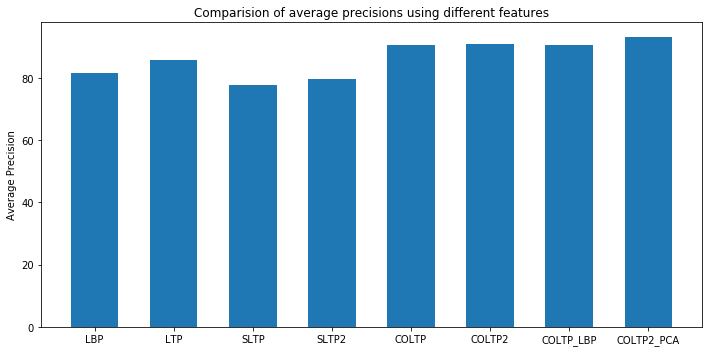

In [6]:
features = ('LBP','LTP','SLTP','SLTP2','COLTP','COLTP2','COLTP_LBP','COLTP2_PCA')
y_pos = np.arange(len(features))
average_precisions = [lbp_city_block_average_precision,ltp_city_block_average_precision,sltp_city_block_average_precision,sltp2_city_block_average_precision,coltp_city_block_average_precision,coltp2_city_block_average_precision,coltp_lbp_city_block_average_precision,coltp2_pca_city_block_average_precision]
plt.figure(figsize=(10,5))
plt.bar(y_pos, average_precisions,0.6 ,align='center')
plt.xticks(y_pos, features)
plt.ylabel('Average Precision')
plt.title('Comparision of average precisions using different features')
plt.tight_layout()
plt.show()

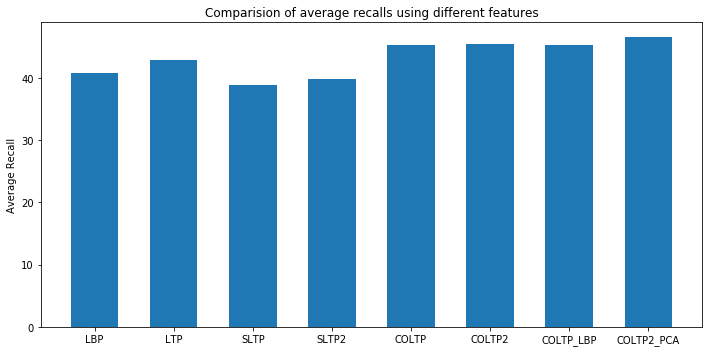

In [7]:
features = ('LBP','LTP','SLTP','SLTP2','COLTP','COLTP2','COLTP_LBP','COLTP2_PCA')
y_pos = np.arange(len(features))
average_recalls = [lbp_city_block_average_recall,ltp_city_block_average_recall,sltp_city_block_average_recall,sltp2_city_block_average_recall,coltp_city_block_average_recall,coltp2_city_block_average_recall,coltp_lbp_city_block_average_recall,coltp2_pca_city_block_average_recall]
plt.figure(figsize=(10,5))
plt.bar(y_pos, average_recalls,0.6 ,align='center')
plt.xticks(y_pos, features)
plt.ylabel('Average Recall')
plt.title('Comparision of average recalls using different features')
plt.tight_layout()
plt.show()

In [8]:
lbp_city_block_average_precisions = []
lbp_city_block_average_recalls = []

ltp_city_block_average_precisions = []
ltp_city_block_average_recalls = []

sltp_city_block_average_precisions = []
sltp_city_block_average_recalls = []

sltp2_city_block_average_precisions = []
sltp2_city_block_average_recalls = []

coltp_city_block_average_precisions = []
coltp_city_block_average_recalls = []

coltp2_city_block_average_precisions = []
coltp2_city_block_average_recalls = []

coltp_lbp_city_block_average_precisions = []
coltp_lbp_city_block_average_recalls = []

coltp2_pca_city_block_average_precisions = []
coltp2_pca_city_block_average_recalls = []

for retrive_images in range(1,11):
    lbp_city_block_average_precisions.append(averagePrecision(lbp,classes,retrive_images,relevant_images_DB)[1])
    lbp_city_block_average_recalls.append(averageRecall(lbp,classes,retrive_images,relevant_images_DB)[1])
    
    ltp_city_block_average_precisions.append(averagePrecision(ltp,classes,retrive_images,relevant_images_DB)[1])
    ltp_city_block_average_recalls.append(averageRecall(ltp,classes,retrive_images,relevant_images_DB)[1])
    
    sltp_city_block_average_precisions.append(averagePrecision(sltp,classes,retrive_images,relevant_images_DB)[1])
    sltp_city_block_average_recalls.append(averageRecall(sltp,classes,retrive_images,relevant_images_DB)[1])
    
    sltp2_city_block_average_precisions.append(averagePrecision(sltp2,classes,retrive_images,relevant_images_DB)[1])
    sltp2_city_block_average_recalls.append(averageRecall(sltp2,classes,retrive_images,relevant_images_DB)[1])
     
    coltp_city_block_average_precisions.append(averagePrecision(coltp,classes,retrive_images,relevant_images_DB)[1])
    coltp_city_block_average_recalls.append(averageRecall(coltp,classes,retrive_images,relevant_images_DB)[1])
    
    coltp2_city_block_average_precisions.append(averagePrecision(coltp2,classes,retrive_images,relevant_images_DB)[1])
    coltp2_city_block_average_recalls.append(averageRecall(coltp2,classes,retrive_images,relevant_images_DB)[1])
    
    coltp_lbp_city_block_average_precisions.append(averagePrecision(coltp_lbp,classes,retrive_images,relevant_images_DB)[1])
    coltp_lbp_city_block_average_recalls.append(averageRecall(coltp_lbp,classes,retrive_images,relevant_images_DB)[1])
    
    coltp2_pca_city_block_average_precisions.append(averagePrecision(coltp2_pca,classes,retrive_images,relevant_images_DB)[1])
    coltp2_pca_city_block_average_recalls.append(averageRecall(coltp2_pca,classes,retrive_images,relevant_images_DB)[1])

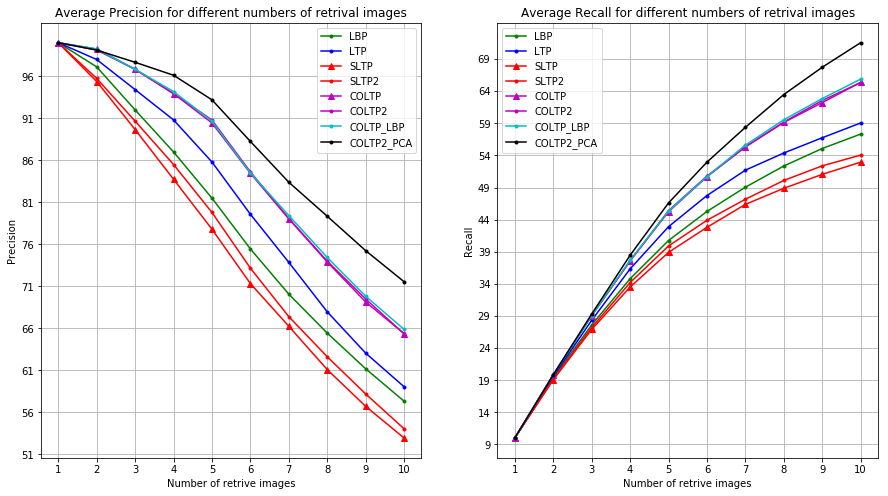

In [9]:
fig = plt.figure(figsize=(15,8))
gs=GridSpec(1,2)
index = range(1,11)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])

ax1.plot(index,lbp_city_block_average_precisions,'-g.',label='LBP')
ax1.plot(index,ltp_city_block_average_precisions,'-b.',label='LTP')
ax1.plot(index,sltp_city_block_average_precisions,'-r^',label='SLTP')
ax1.plot(index,sltp2_city_block_average_precisions,'-r.',label='SLTP2')
ax1.plot(index,coltp_city_block_average_precisions,'-m^',label='COLTP')
ax1.plot(index,coltp2_city_block_average_precisions,'-m.',label='COLTP2')
ax1.plot(index,coltp_lbp_city_block_average_precisions,'-c.',label='COLTP_LBP')
ax1.plot(index,coltp2_pca_city_block_average_precisions,'-k.',label='COLTP2_PCA')

avgprecisions=np.array([lbp_city_block_average_precisions,ltp_city_block_average_precisions,sltp_city_block_average_precisions,sltp2_city_block_average_precisions,coltp_city_block_average_precisions,coltp2_city_block_average_precisions,coltp_lbp_city_block_average_precisions,coltp2_pca_city_block_average_precisions])

ax1.set_xlabel('Number of retrive images')
ax1.set_ylabel('Precision')
ax1.set_title('Average Precision for different numbers of retrival images')
ax1.set_xticks(range(1,11))
ax1.set_yticks(np.arange(math.floor(avgprecisions.min())-1,math.ceil(avgprecisions.max())+1, 5.0))
ax1.grid()
ax1.legend()

ax2.plot(index,lbp_city_block_average_recalls,'-g.',label='LBP')
ax2.plot(index,ltp_city_block_average_recalls,'-b.',label='LTP')
ax2.plot(index,sltp_city_block_average_recalls,'-r^',label='SLTP')
ax2.plot(index,sltp2_city_block_average_recalls,'-r.',label='SLTP2')
ax2.plot(index,coltp_city_block_average_recalls,'-m^',label='COLTP')
ax2.plot(index,coltp2_city_block_average_recalls,'-m.',label='COLTP2')
ax2.plot(index,coltp_lbp_city_block_average_recalls,'-c.',label='COLTP_LBP')
ax2.plot(index,coltp2_pca_city_block_average_recalls,'-k.',label='COLTP2_PCA')

avgrecalls=np.array([lbp_city_block_average_recalls,ltp_city_block_average_recalls,sltp_city_block_average_recalls,sltp2_city_block_average_recalls,coltp_city_block_average_recalls,coltp2_city_block_average_recalls,coltp_lbp_city_block_average_recalls,coltp2_pca_city_block_average_recalls])

ax2.set_xlabel('Number of retrive images')
ax2.set_ylabel('Recall')
ax2.set_title('Average Recall for different numbers of retrival images')
ax2.set_xticks(range(1,11))
ax2.set_yticks(np.arange(math.floor(avgrecalls.min())-1,math.ceil(avgrecalls.max())+1,5.0))
ax2.grid()
ax2.legend()
plt.savefig("Assets\\RETRIVAL PLOT FEATURE WISE.png")

plt.show()